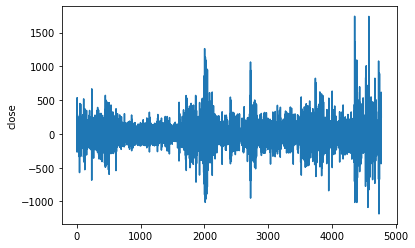

In [38]:
import os
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python import keras
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('C:\\Users\\Mirela\\PycharmProjects\\untitled2\\data_dir\\DJI.csv',
                      usecols=[4]).values.astype('float32')


def delta_time_series(data):
    return data[1:] - data[:-1]

dataset = delta_time_series(dataset)

dataset.shape


def plot_delta(data):
    plt.plot(delta_time_series(data))
    plt.ylabel('close')
    plt.show()


plot_delta(dataset)


In [39]:
# Helper function to get y as a numpy array from the TimeseriesGenerator
def get_y_from_generator(gen):
    '''
    Get all targets y from a TimeseriesGenerator instance.
    '''
    y = None
    for i in range(len(gen)):
        batch_y = gen[i][1]
        if y is None:
            y = batch_y
        else:
            y = np.append(y, batch_y)
    y = y.reshape((-1,1))
    print(y.shape)
    return y

In [40]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets

train, val, test = dataset[0:3000, :], dataset[3001:4000, :], dataset[4001:None, :]

lookback = 5
step = 1
batch_size = 128

train_data_gen = TimeseriesGenerator(train, train,
                                     length=lookback, sampling_rate=step, stride=1,
                                     batch_size=batch_size)

val_data_gen = TimeseriesGenerator(val, val,
                                   length=lookback, sampling_rate=step, stride=1,
                                   batch_size=batch_size)

test_data_gen = TimeseriesGenerator(test, test,
                                    length=lookback, sampling_rate=step, stride=1,
                                    batch_size=batch_size)

val_steps = (4000 - 3001 - lookback)
test_steps = (len(dataset) - 4001 - lookback)

Epoch 1/10
500/500 [==============================] - 17s 35ms/step - loss: 0.0454 - val_loss: 0.0354
Epoch 2/10
500/500 [==============================] - 17s 35ms/step - loss: 0.0410 - val_loss: 0.0328
Epoch 3/10
500/500 [==============================] - 17s 35ms/step - loss: 0.0404 - val_loss: 0.0564
Epoch 4/10
500/500 [==============================] - 17s 35ms/step - loss: 0.0402 - val_loss: 0.0381
Epoch 5/10
500/500 [==============================] - 17s 34ms/step - loss: 0.0401 - val_loss: 0.0362
Epoch 6/10
500/500 [==============================] - 17s 34ms/step - loss: 0.0398 - val_loss: 0.0320
Epoch 7/10
500/500 [==============================] - 17s 34ms/step - loss: 0.0396 - val_loss: 0.0574
Epoch 8/10
500/500 [==============================] - 17s 35ms/step - loss: 0.0395 - val_loss: 0.0370
Epoch 9/10
500/500 [==============================] - 17s 34ms/step - loss: 0.0396 - val_loss: 0.0354
Epoch 10/10
500/500 [==============================] - 17s 35ms/step - loss: 0.039

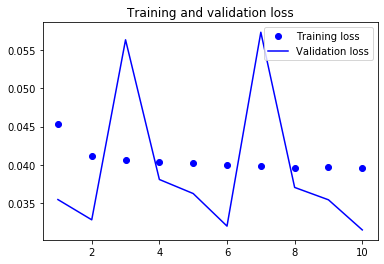

In [37]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, dataset.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_data_gen,
                              steps_per_epoch=500,
                              epochs=10,
                              validation_data=val_data_gen,
                              validation_steps=val_steps)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Epoch 1/10
500/500 [==============================] - 19s 38ms/step - loss: 0.0584 - val_loss: 0.0586
Epoch 2/10
500/500 [==============================] - 18s 37ms/step - loss: 0.0405 - val_loss: 0.0452
Epoch 3/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0396 - val_loss: 0.0583
Epoch 4/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0395 - val_loss: 0.0419
Epoch 5/10
500/500 [==============================] - 19s 37ms/step - loss: 0.0394 - val_loss: 0.0377
Epoch 6/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0393 - val_loss: 0.0388
Epoch 7/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0393 - val_loss: 0.0570
Epoch 8/10
500/500 [==============================] - 18s 37ms/step - loss: 0.0390 - val_loss: 0.0376
Epoch 9/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0393 - val_loss: 0.0385
Epoch 10/10
500/500 [==============================] - 18s 37ms/step - loss: 0.039

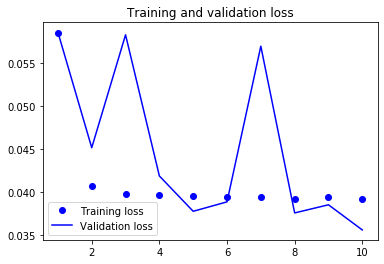

In [41]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.1,
                     recurrent_dropout=0.5,
                     return_sequences=True,
                     input_shape=(None, dataset.shape[-1])))
model.add(layers.GRU(64, activation='relu',
                     dropout=0.1,
                     recurrent_dropout=0.5))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_data_gen,
                              steps_per_epoch=500,
                              epochs=10,
                              validation_data=val_data_gen,
                              validation_steps=val_steps)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Epoch 1/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0537 - val_loss: 0.0358
Epoch 2/10
500/500 [==============================] - 17s 34ms/step - loss: 0.0401 - val_loss: 0.0310
Epoch 3/10
500/500 [==============================] - 17s 34ms/step - loss: 0.0400 - val_loss: 0.0565
Epoch 4/10
500/500 [==============================] - 17s 35ms/step - loss: 0.0395 - val_loss: 0.0387
Epoch 5/10
500/500 [==============================] - 17s 34ms/step - loss: 0.0395 - val_loss: 0.0337
Epoch 6/10
500/500 [==============================] - 18s 35ms/step - loss: 0.0394 - val_loss: 0.0321
Epoch 7/10
500/500 [==============================] - 17s 35ms/step - loss: 0.0393 - val_loss: 0.0572
Epoch 8/10
500/500 [==============================] - 17s 34ms/step - loss: 0.0395 - val_loss: 0.0369 ET
Epoch 9/10
500/500 [==============================] - 17s 34ms/step - loss: 0.0390 - val_loss: 0.0340
Epoch 10/10
500/500 [==============================] - 17s 34ms/step - loss: 0.

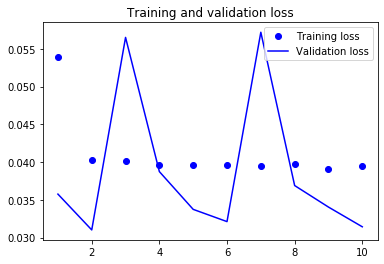

In [42]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, dataset.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_data_gen,
                              steps_per_epoch=500,
                              epochs=10,
                              validation_data=val_data_gen,
                              validation_steps=val_steps)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Epoch 1/10
500/500 [==============================] - 19s 39ms/step - loss: 0.0552 - val_loss: 0.0614
Epoch 2/10
500/500 [==============================] - 18s 37ms/step - loss: 0.0407 - val_loss: 0.0444
Epoch 3/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0399 - val_loss: 0.0580
Epoch 4/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0396 - val_loss: 0.0433
Epoch 5/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0395 - val_loss: 0.0438
Epoch 6/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0392 - val_loss: 0.0353
Epoch 7/10
500/500 [==============================] - 19s 37ms/step - loss: 0.0394 - val_loss: 0.0565
Epoch 8/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0391 - val_loss: 0.0392
Epoch 9/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0391 - val_loss: 0.0353
Epoch 10/10
500/500 [==============================] - 18s 36ms/step - loss: 0.039

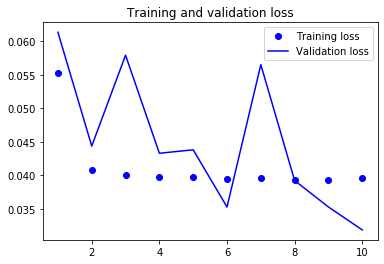

In [43]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.1,
                     recurrent_dropout=0.5,
                     return_sequences=True,
                     input_shape=(None, dataset.shape[-1])))
model.add(layers.GRU(64, activation='relu',
                     dropout=0.1,
                     recurrent_dropout=0.5))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_data_gen,
                              steps_per_epoch=500,
                              epochs=10,
                              validation_data=val_data_gen,
                              validation_steps=val_steps)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [44]:
test_loss = model.evaluate_generator(test_data_gen,steps=test_steps)
print('test loss:', test_loss)


test loss: 0.029340600594878197


In [45]:
testPredict = model.predict_generator(test_data_gen)
testPredict.shape

(772, 1)

In [46]:
testPredict = scaler.inverse_transform(testPredict)

In [47]:
testY = get_y_from_generator(test_data_gen)

(772, 1)


In [48]:
testY = scaler.inverse_transform(testY)

In [50]:
from sklearn.metrics import mean_squared_error
import math
# calculate root mean squared error
testScore = math.sqrt(mean_squared_error(testY[:, 0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 202.22 RMSE
